#  Background_Decr
Example to illustrate the background estimator (class TSpectrum).




**Author:**  Miroslav Morhac, Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:34 AM.</small></i>

In [1]:
Int_t i;
const Int_t nbins = 1024;
Double_t xmin     = 0;
Double_t xmax     = nbins;
Double_t source[nbins];
gROOT->ForceStyle();

TH1F *d    = new TH1F("d","",nbins,xmin,xmax);

TString dir  = gROOT->GetTutorialDir();
TString file = dir+"/spectrum/TSpectrum.root";
TFile *f     = new TFile(file.Data());
TH1F *back = (TH1F*) f->Get("back1");
back->SetTitle("Estimation of background with decreasing window");
back->GetXaxis()->SetRange(1,nbins);
back->Draw("L");

TSpectrum *s = new TSpectrum();

for (i = 0; i < nbins; i++) source[i]=back->GetBinContent(i + 1);

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Estimate the background

In [2]:
s->Background(source,nbins,6,TSpectrum::kBackDecreasingWindow,
              TSpectrum::kBackOrder2,kFALSE,
              TSpectrum::kBackSmoothing3,kFALSE);

Draw the estimated background

In [3]:
for (i = 0; i < nbins; i++) d->SetBinContent(i + 1,source[i]);
d->SetLineColor(kRed);
d->Draw("SAME L");

Draw all canvases 

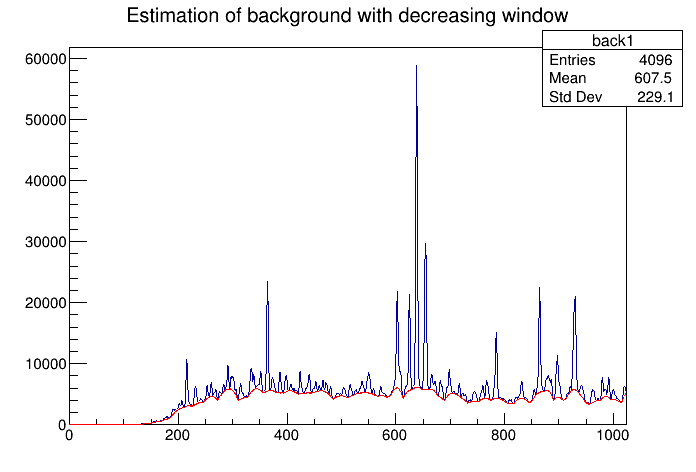

In [4]:
gROOT->GetListOfCanvases()->Draw()